In [1]:
import numpy as np
import pandas as pd
import lumfunc as lf

In [2]:
# UNPACK DATA
# Data is usually catalogued in a .fits file - .csv test file is used here for simplicity

data_table = pd.read_csv('test_catalogue.csv')

ID_list = np.array(data_table['ID'])

RA_list = np.array(data_table['RA'])
Dec_list = np.array(data_table['Dec'])

u_app_mag_list = np.array(data_table['u_mag'])
u_app_mag_err_list = np.array(data_table['u_mag_err'])
g_app_mag_list = np.array(data_table['g_mag'])
g_app_mag_err_list = np.array(data_table['g_mag_err'])
r_app_mag_list = np.array(data_table['r_mag'])
r_app_mag_err_list = np.array(data_table['r_mag_err'])
i_app_mag_list = np.array(data_table['i_mag'])
i_app_mag_err_list = np.array(data_table['i_mag_err'])
Z_app_mag_list = np.array(data_table['Z_mag'])
Z_app_mag_err_list = np.array(data_table['Z_mag_err'])
Y_app_mag_list = np.array(data_table['Y_mag'])
Y_app_mag_err_list = np.array(data_table['Y_mag_err'])
J_app_mag_list = np.array(data_table['J_mag'])
J_app_mag_err_list = np.array(data_table['J_mag_err'])
H_app_mag_list = np.array(data_table['H_mag'])
H_app_mag_err_list = np.array(data_table['H_mag_err'])
K_app_mag_list = np.array(data_table['K_mag'])
K_app_mag_err_list = np.array(data_table['K_mag_err'])

z_photo_list = np.array(data_table['z_photo'])
z_spec_list = np.array(data_table['z_spec'])

In [3]:
r_maggies_list = lf.get_maggy(r_app_mag_list)
print(r_maggies_list[0:4])

[1.83315843e-08 2.27614539e-08 1.33659552e-08 1.13031632e-07]


In [4]:
lf.get_maggy(np.array([19.342, 19.107, 19.685, 17.367]))

array([1.83315843e-08, 2.27614539e-08, 1.33659552e-08, 1.13031632e-07])

In [5]:
r_maggy_inv_var_list = lf.get_maggy_inv_var(r_maggies_list, r_app_mag_err_list)
print(r_maggy_inv_var_list[0:4])

[2.19244475e+20 5.68838063e+20 4.12409497e+20 9.22674759e+19]


/Users/manasveesaraf/anaconda3/lib/python3.6/site-packages/lumfunc.py:88: RuntimeWarning: divide by zero encountered in power
  inv_var_list = (0.4 * np.log(10) * maggies_list * app_mag_err_list)**(-2)


In [6]:
lf.get_maggy_inv_var(np.array([1.83315843e-08, 2.27614539e-08, 1.33659552e-08, 1.13031632e-07]),
                     np.array([0.004, 0.002, 0.004, 0.001]))

array([2.19244474e+20, 5.68838064e+20, 4.12409494e+20, 9.22674766e+19])

In [7]:
maggy_ratios_table = pd.read_csv('test_maggy_ratios.csv', delimiter=' ')
r_maggy_ratio_list = np.array(maggy_ratios_table['maggy_ratio'])

In [8]:
# need to add kcorrect functions to get maggy_ratio_list and test:
r_rest_mag_list = lf.get_rest_mag(z_photo_list, r_app_mag_list,
                                  r_maggy_ratio_list)
print(r_rest_mag_list[0:4])

	Luminosity distance calculated.
	Absolute magnitude calculated.
	K-corrections calculated.
	Rest-frame magnitude calculated.
[-22.89979359 -21.51881811 -23.02717126 -20.79614551]


In [9]:
lf.get_rest_mag(np.array([0.42, 0.24, 0.46, 0.09]),
                np.array([19.342, 19.107, 19.685, 17.367]),
                np.array([0.67165941, 0.81335927, 0.54066526, 0.91925443]))

	Luminosity distance calculated.
	Absolute magnitude calculated.
	K-corrections calculated.
	Rest-frame magnitude calculated.


array([-22.8997936 , -21.51881811, -23.02717126, -20.79614551])

In [10]:
# need to add zmax functions to get Vmax and not V
V_list = lf.get_volume(100.0, z_photo_list)
print(V_list[:4])

	Comoving distance calculated.
	Survey area converted.
	Comoving volume calculated.
[43208407.50293904  9274338.02683353 54988309.45363603   546254.32632565]


In [11]:
lf.get_volume(100.0, np.array([0.42, 0.24, 0.46, 0.09]))

	Comoving distance calculated.
	Survey area converted.
	Comoving volume calculated.


array([43208407.50293904,  9274338.02683353, 54988309.45363603,
         546254.32632565])

In [12]:
M_list, M_err_list, phi_list = lf.get_binned_phi(r_rest_mag_list, V_list, 10)
print(M_list)
print(M_err_list)
print(phi_list)

[-27.75116273 -26.26581137 -24.78046    -23.29510864 -21.80975727
 -20.32440591 -18.83905454 -17.35370318 -15.86835182 -14.38300045]
[0.74267568 0.74267568 0.74267568 0.74267568 0.74267568 0.74267568
 0.74267568 0.74267568 0.74267568 0.74267568]
[5.12016808e-10 0.00000000e+00 6.87358202e-08 3.55674570e-06
 1.18791217e-05 2.44735150e-05 5.43431411e-05 1.30067824e-04
 1.04554476e-04 1.74886746e-03]


In [13]:
lf.get_binned_phi(
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]), 4)

(array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([1.06411667e-08, 1.02900000e-08, 0.00000000e+00, 1.32300000e-07]))

In [14]:
centers_array = lf.get_patches_centers(RA_list,
                                       Dec_list,
                                       10,
                                       survey='kids',
                                       max_iterations=int(100),
                                       tolerance=1.0e-1)
print(centers_array)

X (100, 2)  centers (10, 2)  tol=0.1  maxiter=100
3 iterations  cluster sizes: [ 4 12  9  8 18 10  7 10 16  6]
X (662, 2)  centers (10, 2)  tol=0.1  maxiter=100
2 iterations  cluster sizes: [ 37 102  58  50 102  65  44  51 102  51]
[[ 1.35724979e+02  1.52589712e+00]
 [ 2.13886562e+02  5.25543639e-01]
 [ 1.84549751e+02  8.66219539e-01]
 [ 1.33268568e+02 -8.46675727e-01]
 [ 2.19593554e+02  3.99494308e-01]
 [ 1.29847456e+02  1.31916843e+00]
 [ 1.84665471e+02 -1.82277975e+00]
 [ 1.75125981e+02 -1.26953560e-01]
 [ 1.79504302e+02 -3.76906511e-01]
 [ 1.38831898e+02  2.42707165e-01]]


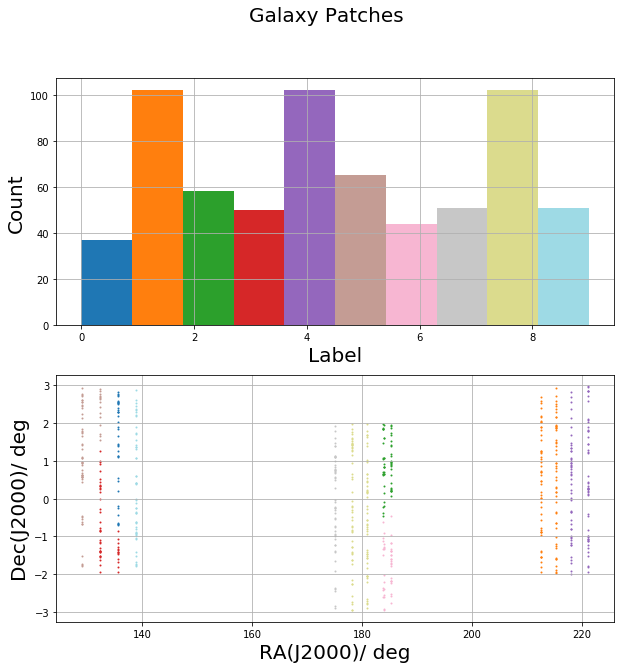

[5 5 5 5]


In [15]:
labels = lf.get_patches(RA_list,
                        Dec_list,
                        10,
                        centers_array,
                        survey='kids',
                        numba_installed=True,
                        plot_savename='test_patches.png')
print(labels[:4])

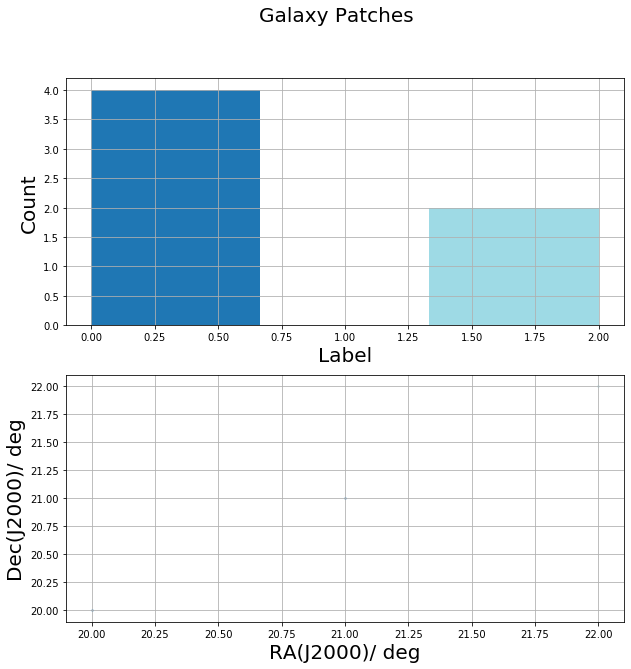

array([0, 0, 2, 0, 0, 2])

In [16]:
lf.get_patches(np.array([20, 21, 22, 20, 21, 22]),
               np.array([20, 21, 22, 20, 21, 22]),
               3,
               np.array([[20, 21], [22, 20], [21, 22], [20, 21], [22, 20],
                         [21, 22]]),
               survey='kids',
               numba_installed=True,
               plot_savename='test2_patches.png')

In [17]:
phi_err_list = lf.get_binned_phi_error(r_rest_mag_list, V_list, labels, 10, 10)
print(phi_err_list)

[3.18679883e-06 5.30069419e-06 6.22481286e-06 8.88152653e-06
 1.01481597e-05 3.45329307e-05 2.53192074e-05 1.11425497e-04
 2.02031224e-04 3.58404012e-03]


In [18]:
lf.get_binned_phi_error(
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]), np.array([1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 3]), 4, 4)

array([9.86494122e-09, 9.90155712e-09, 0.00000000e+00, 1.55859031e-07])

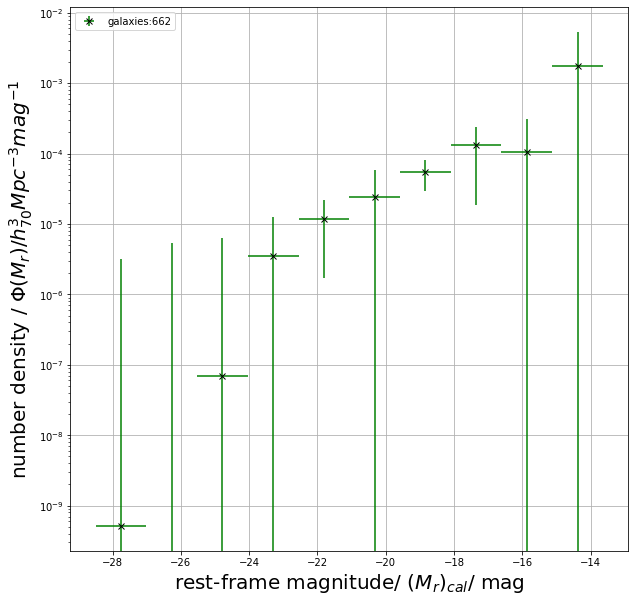

In [19]:
M_list, M_err_list, Phi_list, Phi_err_list = lf.plot_LF(
    r_rest_mag_list,
    V_list,
    10,
    RA_list,
    Dec_list,
    10,
    centers_array,
    survey='kids',
    numba_installed=True,
    plot_savename='test_LF.png')

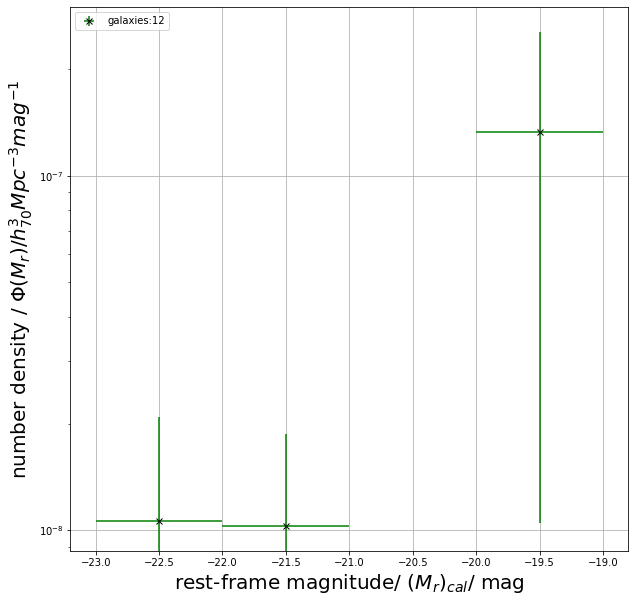

(array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([1.06411667e-08, 1.02900000e-08, 0.00000000e+00, 1.32300000e-07]),
 array([1.01898861e-08, 8.40174982e-09, 0.00000000e+00, 1.21812068e-07]))

In [20]:
lf.plot_LF(
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]),
    4,
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    3,
    np.array([[20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22],
              [20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22]]),
    plot_savename='test2_LF.png')

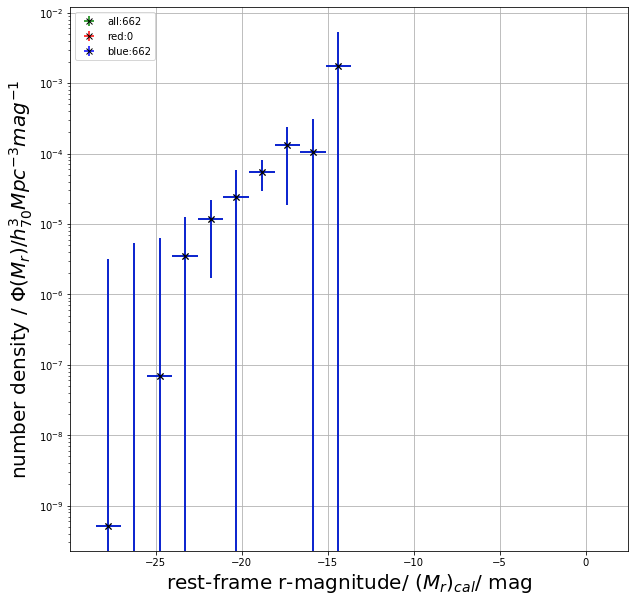

In [21]:
all_M_list, all_M_err_list, all_phi_list, all_phi_err_list, red_M_list, red_M_err_list, red_phi_list, red_phi_err_list, blue_M_list, blue_M_err_list, blue_phi_list, blue_phi_err_list = lf.analyse_LF_by_colour(
    0.0,
    0.65,
    r_rest_mag_list,
    V_list,
    10,
    RA_list,
    Dec_list,
    10,
    centers_array,
    survey='kids',
    numba_installed=True,
    plot_savename='test_LF_colour.png')

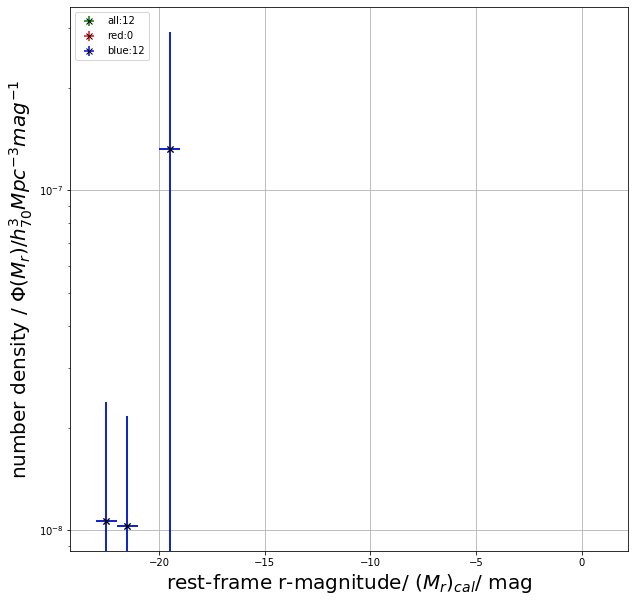

(array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([1.06411667e-08, 1.02900000e-08, 0.00000000e+00, 1.32300000e-07]),
 array([1.32736524e-08, 1.13760230e-08, 0.00000000e+00, 1.60058333e-07]),
 array([0.125, 0.375, 0.625, 0.875]),
 array([-0.125, -0.125, -0.125, -0.125]),
 array([-0., -0., -0., -0.]),
 array([0., 0., 0., 0.]),
 array([-22.5, -21.5, -20.5, -19.5]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([1.06411667e-08, 1.02900000e-08, 0.00000000e+00, 1.32300000e-07]),
 array([1.32736524e-08, 1.13760230e-08, 0.00000000e+00, 1.60058333e-07]))

In [22]:
lf.analyse_LF_by_colour(
    0.0,
    0.65,
    np.array([-23, -21, -19, -22, -23, -23, -22, -23, -22, -22, -19, -21]),
    np.array([
        8e+08, 2e+08, 2e+07, 3e+08, 6e+08, 6e+08, 4e+08, 7e+08, 5e+08, 6e+08,
        7e+06, 1e+08
    ]),
    4,
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    np.array([20, 21, 22, 20, 21, 22, 20, 21, 22, 20, 21, 22]),
    4,
    np.array([[20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22],
              [20, 21], [22, 20], [21, 22], [20, 21], [22, 20], [21, 22]]),
    plot_savename='test2_LF_colour.png')

In [23]:
lf.SchechterMagModel(
    np.array([
        -24.7, -24.1, -23.5, -22.9, -22.3, -21.7, -21.1, -20.5, -19.9, -19.3,
        -18.7, -18.1, -17.5, -16.9
    ]), -20.7, 9.5e-3, -1.3)

array([1.48738894e-20, 3.84492154e-13, 7.60121493e-09, 2.41845904e-06,
       7.14883236e-05, 5.38394815e-04, 1.84608957e-03, 4.02502766e-03,
       6.76289862e-03, 9.78103139e-03, 1.29768190e-02, 1.63829142e-02,
       2.01005151e-02, 2.42596093e-02])

In [24]:
# # no M_list
# sch1_model_Phi_list = lf.SchechterMagModel(M_list, -20.7, 9.5e-3, -1.3)
# print(sch1_model_phi_list[:4])

In [25]:
lf.DoubleSchechterMagModel(
    np.array([
        -24.7, -24.1, -23.5, -22.9, -22.3, -21.7, -21.1, -20.5, -19.9, -19.3,
        -18.7, -18.1, -17.5, -16.9
    ]), -20.7, 6.16e-3, -0.79, 6.16e-3, -0.79)

array([1.26273335e-19, 2.46249062e-12, 3.67257028e-08, 8.81507149e-06,
       1.96572253e-04, 1.11683231e-03, 2.88894898e-03, 4.75177613e-03,
       6.02309870e-03, 6.57160960e-03, 6.57741662e-03, 6.26438239e-03,
       5.79821466e-03, 5.27923390e-03])

In [26]:
# # no M_list
# sch2_model_Phi_list = lf.DoubleSchechterMagModel(M_list, -20.7, 9.5e-3, -1.3)
# print(sch2_model_phi_list[:4])

In [27]:
lf.get_gof(
    np.array([
        8.05e-07, 3.88e-06, 3.69e-05, 1.89e-04, 4.05e-04, 6.72e-04, 9.09e-04,
        1.11e-03, 1.48e-03, 2.49e-03, 3.51e-03, 3.72e-03, 5.01e-03, 7.55e-03
    ]),
    np.array([
        2.61e-07, 1.25e-06, 9.52e-06, 3.89e-05, 8.49e-05, 1.39e-04, 2.00e-04,
        2.57e-04, 3.95e-04, 6.88e-04, 1.10e-03, 1.17e-03, 1.39e-03, 2.17e-03
    ]),
    np.array([
        1.61e-07, 5.04e-06, 4.02e-05, 1.46e-04, 3.40e-04, 6.09e-04, 9.40e-04,
        1.33e-03, 1.79e-03, 2.35e-03, 3.04e-03, 3.89e-03, 4.95e-03, 6.28e-03
    ]), 3)

1.0041144106155364

In [28]:
# # error in other functions
# gof = lf.get_gof(all_phi_list,all_phi_err_list, sch1_model_Phi_list, 3)
# print(gof)

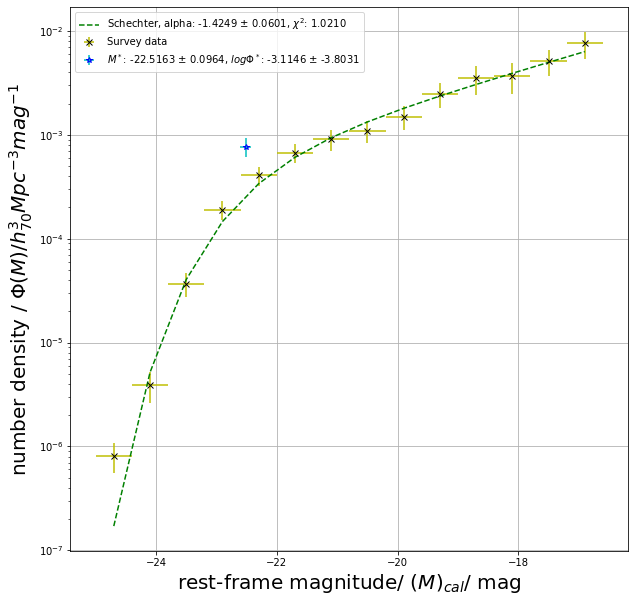

(array([1.71053536e-07, 5.16404480e-06, 4.05370711e-05, 1.46583441e-04,
        3.39318246e-04, 6.07660357e-04, 9.38795731e-04, 1.33220354e-03,
        1.80023894e-03, 2.36519761e-03, 3.05753557e-03, 3.91587143e-03,
        4.98834428e-03, 6.33496571e-03]),
 1.0209802688993401,
 -22.51627500778435,
 0.09643423019822513,
 0.0007681235644217974,
 0.00015735301981608952,
 -1.4248810024852225,
 0.06007607488402875)

In [29]:
lf.get_schechter_phi(np.array([
    -24.7, -24.1, -23.5, -22.9, -22.3, -21.7, -21.1, -20.5, -19.9, -19.3,
    -18.7, -18.1, -17.5, -16.9
]),
    np.ones(14) * 0.3,
    np.array([
        8.1e-07, 3.9e-06, 3.7e-05, 1.9e-04, 4.1e-04, 6.7e-04,
        9.1e-04, 1.1e-03, 1.5e-03, 2.5e-03, 3.5e-03, 3.7e-03,
        5.1e-03, 7.6e-03
    ]),
    np.array([
        2.6e-07, 1.3e-06, 9.5e-06, 3.9e-05, 8.5e-05, 1.4e-04,
        2.1e-04, 2.6e-04, 3.9e-04, 6.9e-04, 1.1e-03, 1.2e-03,
        1.4e-03, 2.2e-03
    ]),
    np.array([-20.71, 9.5e-3, -1.3]),
    plot_savename='test_Sch.png')

In [30]:
# # error in other functions
# sch1_model_phi_list, chi_sq_1, M_star, M_star_err, phi_star, phi_star_err, alpha_star, alpha_star_err = lf.get_schechter_phi(
#     M_list,
#     M_err_list,
#     all_phi_list,
#     all_phi_err_list,
#     np.array([-20.71, 9.5e-3, -1.3]),
#     plot_savename='test2_Sch.png')

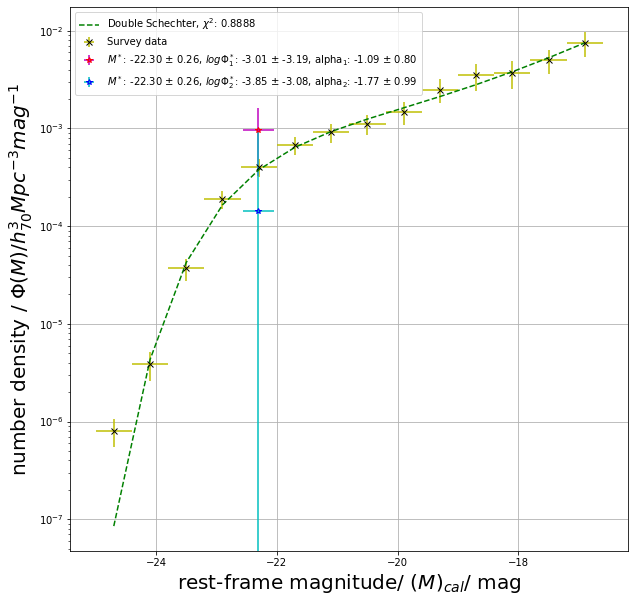

(array([8.52160254e-08, 4.30479510e-06, 4.25294771e-05, 1.65136448e-04,
        3.77248531e-04, 6.40958991e-04, 9.29145543e-04, 1.24659941e-03,
        1.62508333e-03, 2.11836716e-03, 2.80552684e-03, 3.80265411e-03,
        5.28333171e-03, 7.51056271e-03]),
 0.8888283543610924,
 -22.303878380116704,
 0.2646412794527086,
 0.0009668887609189701,
 0.000640187578339006,
 -1.0900241221219484,
 0.7987986322969173,
 0.0001418318772494868,
 0.0008399596540331241,
 -1.774506451062984,
 0.9946532141625982)

In [31]:
lf.get_double_schechter_phi(np.array([
    -24.7, -24.1, -23.5, -22.9, -22.3, -21.7, -21.1, -20.5, -19.9, -19.3,
    -18.7, -18.1, -17.5, -16.9
]),
    np.ones(14) * 0.3,
    np.array([
        8.05e-07, 3.88e-06, 3.69e-05, 1.89e-04,
        4.05e-04, 6.72e-04, 9.09e-04, 1.11e-03,
        1.48e-03, 2.49e-03, 3.51e-03, 3.72e-03,
        5.01e-03, 7.55e-03
    ]),
    np.array([
        2.61e-07, 1.25e-06, 9.52e-06, 3.89e-05,
        8.49e-05, 1.39e-04, 2.00e-04, 2.57e-04,
        3.95e-04, 6.88e-04, 1.10e-03, 1.17e-03,
        1.39e-03, 2.17e-03
    ]),
    np.array([-20.7, 6.16e-3, -0.79, 6.16e-3, -0.79]),
    plot_savename='test_dSch.png')

In [32]:
# # error in other functions
# sch2_model_phi_list, chi_sq_1, M_star, M_star_err, phi_star, phi_star_err, alpha_star, alpha_star_err = lf.get_double_schechter_phi(
#     M_list,
#     M_err_list,
#     all_phi_list,
#     all_phi_err_list,
#     np.array([-20.7, 6.16e-3, -0.79, 6.16e-3, -0.79]),
#     plot_savename='test2_Sch.png')